## **1. Load and Pre-process the Dataset**

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Inspect the data
print(df.head())
print(df.info())

# Handle missing values
df = df.dropna()

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None


## **2. Data Exploration and Cleaning**

In [3]:
# Display basic information about the dataset
print(df.describe())
print(df.info())

# Check for outliers and inconsistencies
# For simplicity, let's consider values greater than 0 as valid for this dataset

# Example of identifying inconsistencies (if any) and handling them
df = df[(df['Confirmed'] >= 0) & (df['Deaths'] >= 0) & (df['Recovered'] >= 0)]

# Display the first few rows
print(df.head())

                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  
count  161568.000000  
mean    13999.436089  
min         0.000000  
25%        17.000000  
50%       365.000000  
75%      4509.000000  
max    988609.000000  
std     59113.581271  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     ------

## **3. Visualize Global Trends**

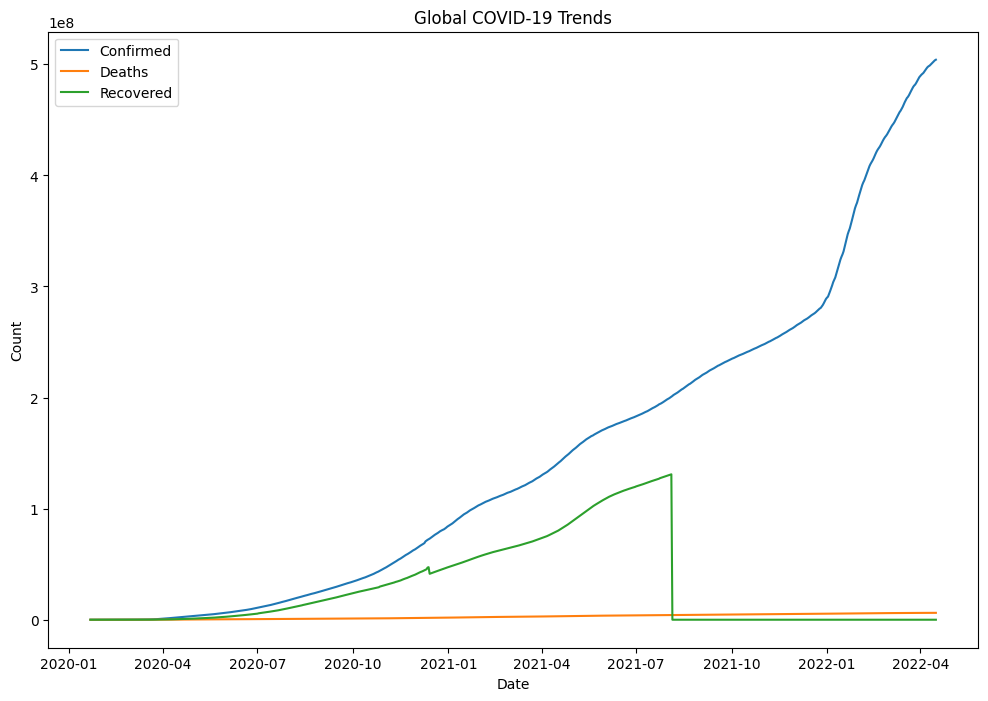

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the global trends
global_trends = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(global_trends['Date'], global_trends['Confirmed'], label='Confirmed')
plt.plot(global_trends['Date'], global_trends['Deaths'], label='Deaths')
plt.plot(global_trends['Date'], global_trends['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends')
plt.legend()
plt.show()

## **4. Country-Specific Analysis**

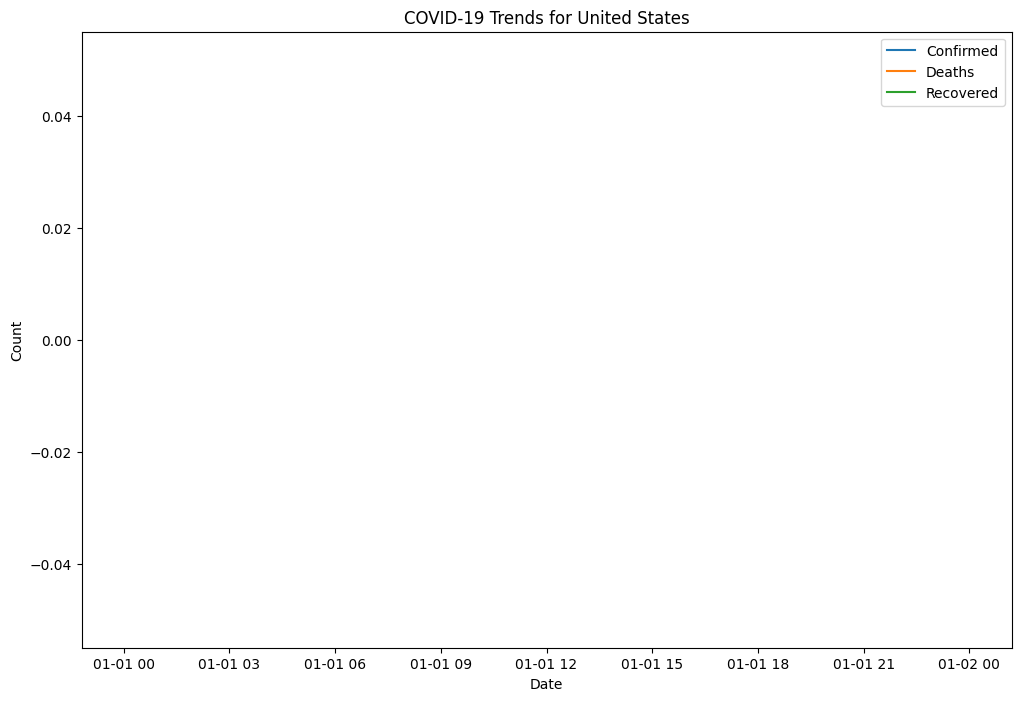

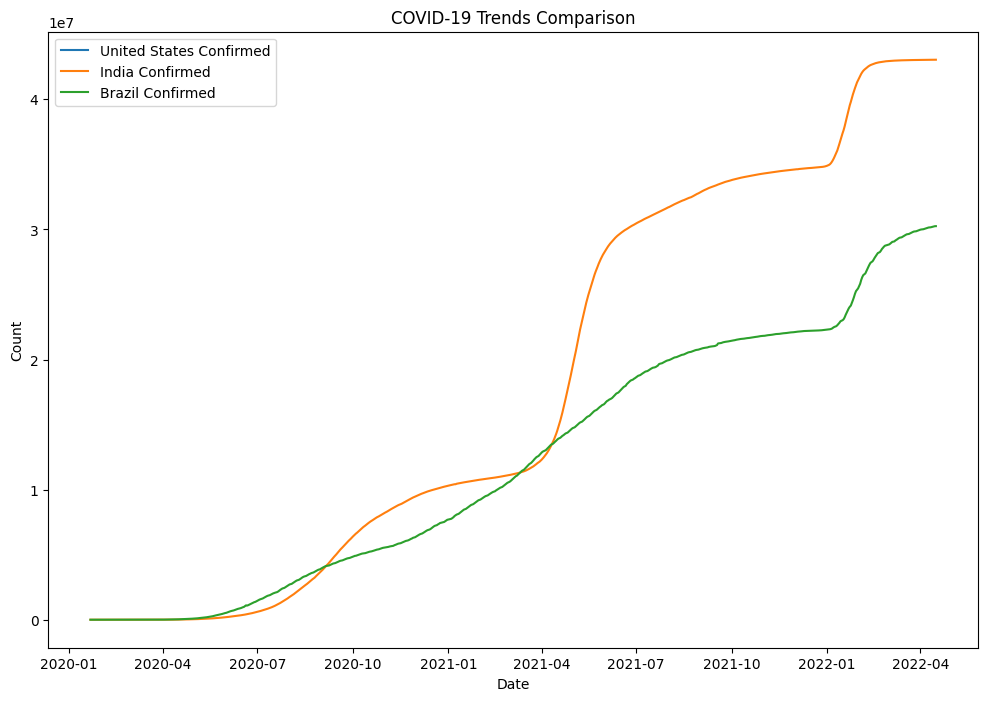

In [5]:
def plot_country_trends(country):
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(12, 8))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed')
    plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths')
    plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Trends for {country}')
    plt.legend()
    plt.show()

# Example usage
plot_country_trends('United States')

# Compare trends of multiple countries
def compare_countries(countries):
    plt.figure(figsize=(12, 8))
    for country in countries:
        country_data = df[df['Country'] == country]
        plt.plot(country_data['Date'], country_data['Confirmed'], label=f'{country} Confirmed')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title('COVID-19 Trends Comparison')
    plt.legend()
    plt.show()

# Example usage
compare_countries(['United States', 'India', 'Brazil'])

## **5. Comparative Analysis**

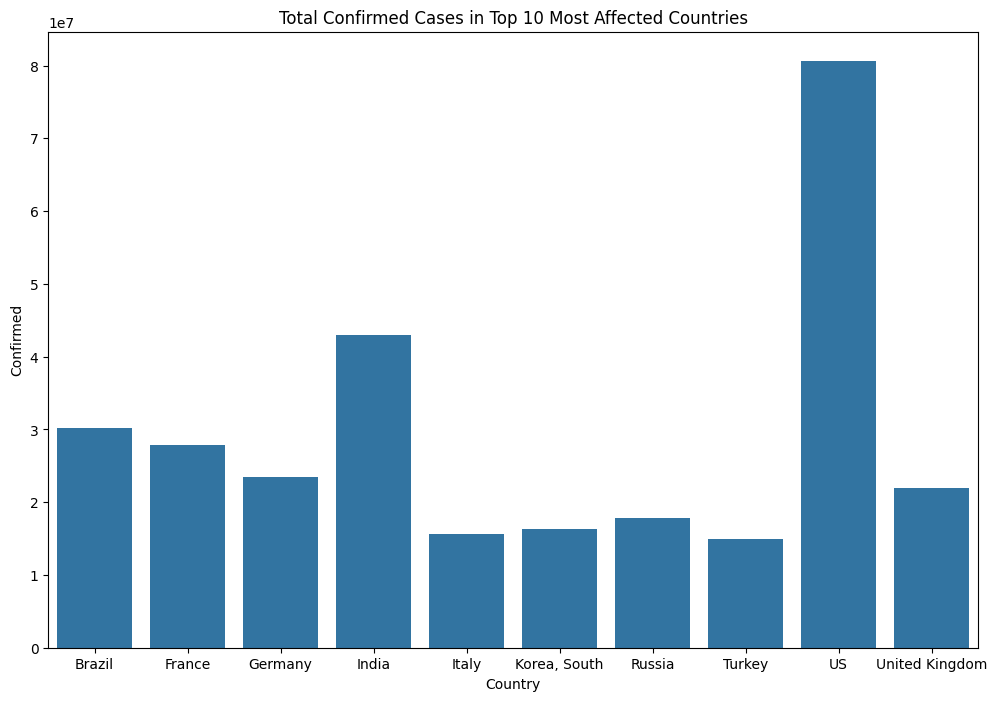

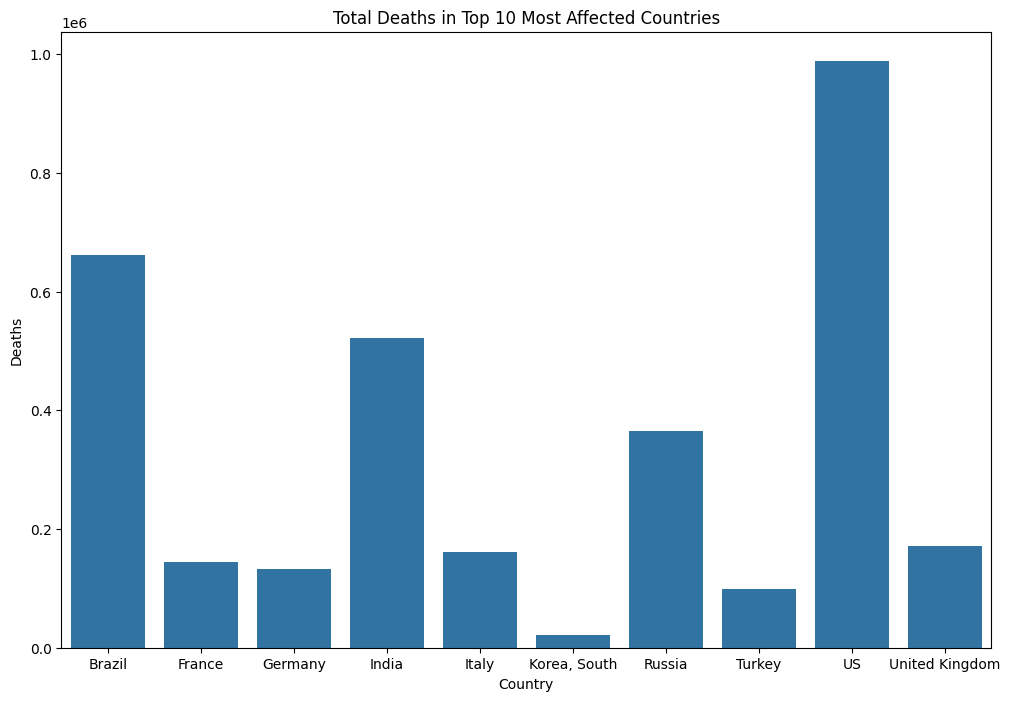

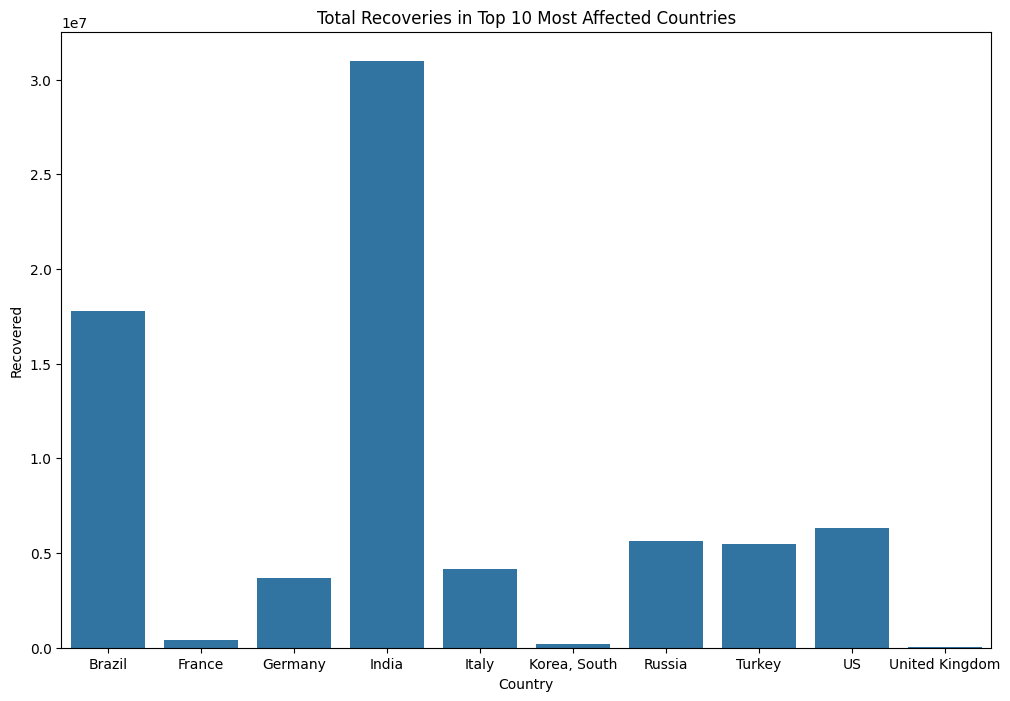

<ipython-input-6-550f8ad8ba6c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Confirmed_MA'] = top_countries_data.groupby('Country')['Confirmed'].transform(lambda x: x.rolling(window=7).mean())
<ipython-input-6-550f8ad8ba6c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['Deaths_MA'] = top_countries_data.groupby('Country')['Deaths'].transform(lambda x: x.rolling(window=7).mean())


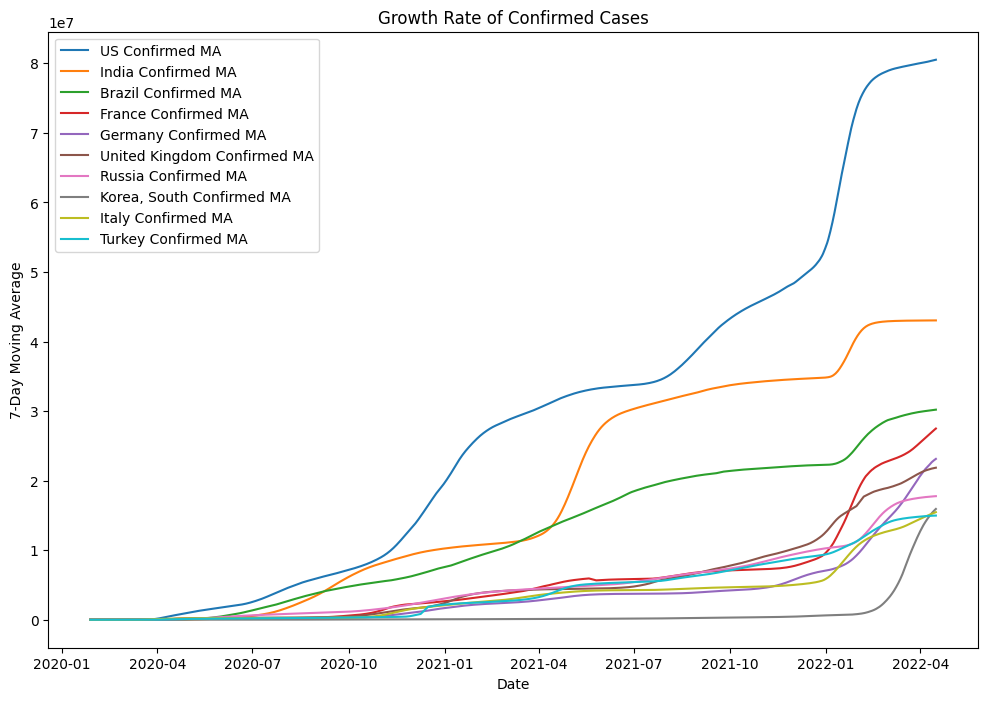

In [6]:
# Top 10 most affected countries
top_countries = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10).index
top_countries_data = df[df['Country'].isin(top_countries)]

# Bar plots for the total number of confirmed cases, deaths, and recoveries
total_counts = top_countries_data.groupby('Country').max().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Confirmed', data=total_counts)
plt.title('Total Confirmed Cases in Top 10 Most Affected Countries')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Deaths', data=total_counts)
plt.title('Total Deaths in Top 10 Most Affected Countries')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Recovered', data=total_counts)
plt.title('Total Recoveries in Top 10 Most Affected Countries')
plt.show()

# Growth rate using moving averages
top_countries_data['Confirmed_MA'] = top_countries_data.groupby('Country')['Confirmed'].transform(lambda x: x.rolling(window=7).mean())
top_countries_data['Deaths_MA'] = top_countries_data.groupby('Country')['Deaths'].transform(lambda x: x.rolling(window=7).mean())

plt.figure(figsize=(12, 8))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed_MA'], label=f'{country} Confirmed MA')
plt.xlabel('Date')
plt.ylabel('7-Day Moving Average')
plt.title('Growth Rate of Confirmed Cases')
plt.legend()
plt.show()

## **6. Correlation Analysis**

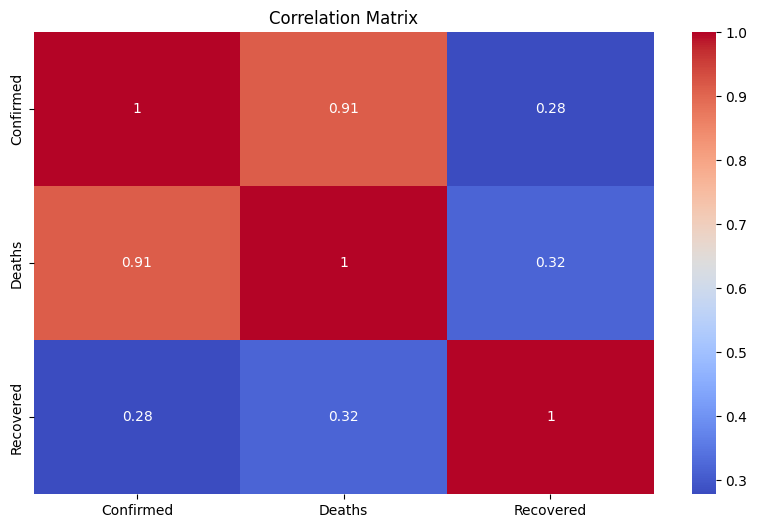

In [7]:
# Correlation analysis
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Covid-19 Data Analysis, Part-**2**


## **1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw plots separately.**

In [22]:
import pandas as pd

# Load dataset from URL
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(0, inplace=True)

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


## **2. Which country has the highest number of confirmed cases, deaths, and recoveries as of the latest date in the dataset?**

In [23]:
# Display basic information about the dataset
print(df.info())

# Display number of rows and columns
print("Shape of the dataset:", df.shape)

# Display first few rows
print(df.head())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None
Shape of the dataset: (161568, 5)
        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0
                                Date     Confirmed     Recovered  \
count                         161568  1.61

## **3. How do the trends of confirmed cases differ between the top 5 most affected countries?**

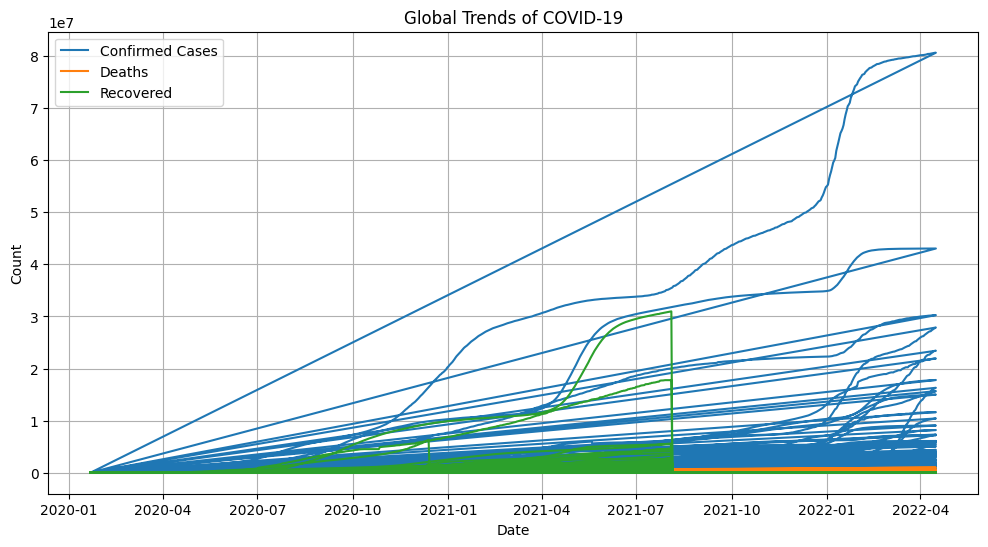

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot trends of confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed Cases')
plt.plot(df['Date'], df['Deaths'], label='Deaths')
plt.plot(df['Date'], df['Recovered'], label='Recovered')
plt.title('Global Trends of COVID-19')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## **4. What is the growth rate of confirmed cases, deaths, and recoveries globally?**

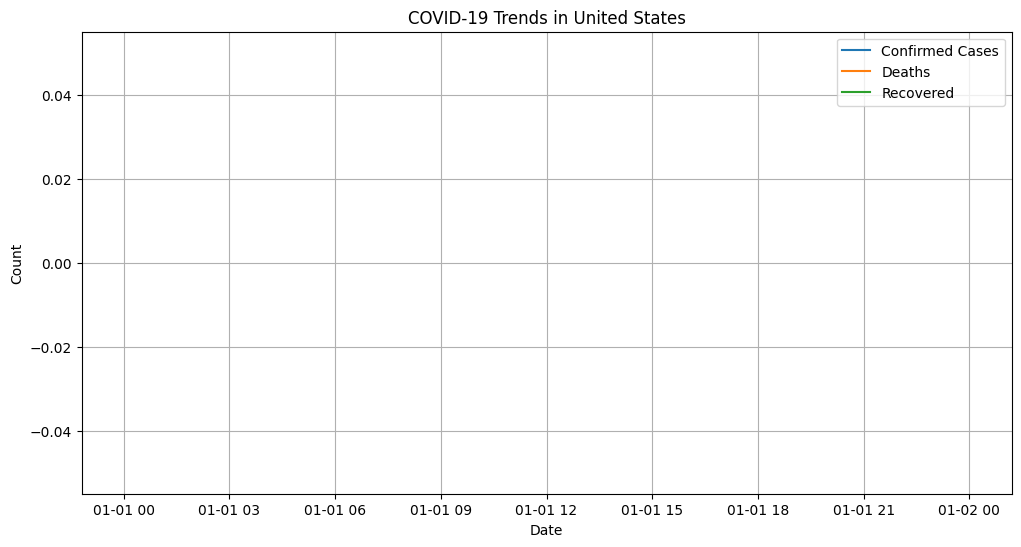

In [25]:
# Specify a country (e.g., 'United States') and visualize trends
country = 'United States'
df_country = df[df['Country'] == country]

plt.figure(figsize=(12, 6))
plt.plot(df_country['Date'], df_country['Confirmed'], label='Confirmed Cases')
plt.plot(df_country['Date'], df_country['Deaths'], label='Deaths')
plt.plot(df_country['Date'], df_country['Recovered'], label='Recovered')
plt.title(f'COVID-19 Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


## **5. What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most affected countries?**

<ipython-input-28-408b99ef7009>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Confirmed', data=df_top, estimator=sum, ci=None)


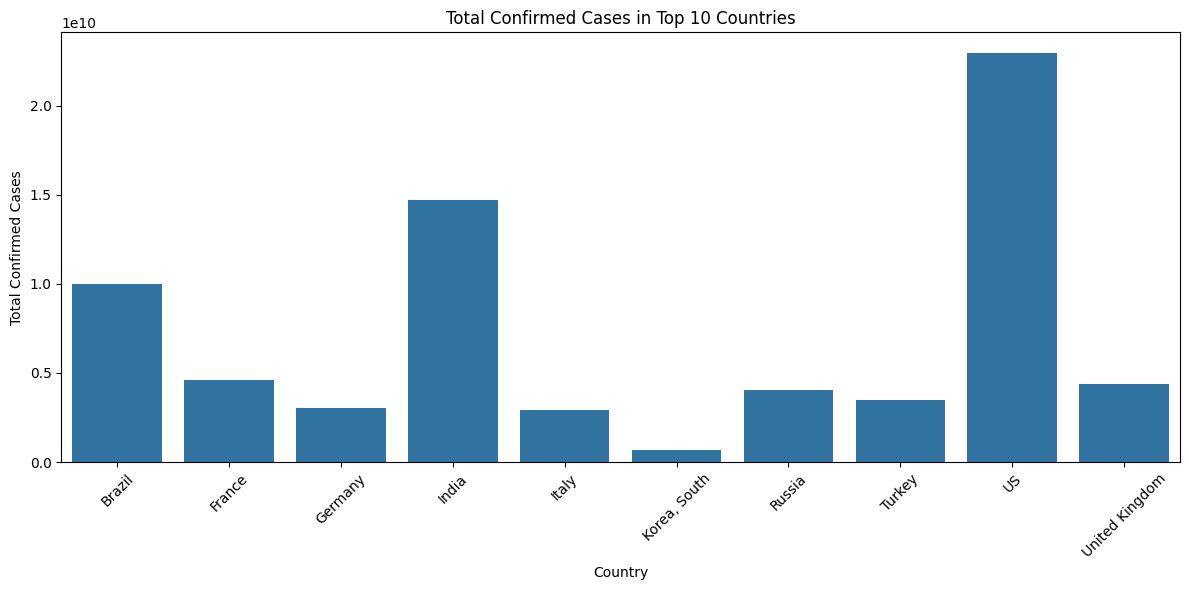

In [28]:
# Create bar plots to compare top 10 most affected countries
top_countries = df.groupby('Country')['Confirmed'].max().nlargest(10).index.tolist()
df_top = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Confirmed', data=df_top, estimator=sum, ci=None)
plt.title('Total Confirmed Cases in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## **6. How does the recovery rate compare across different countries?**

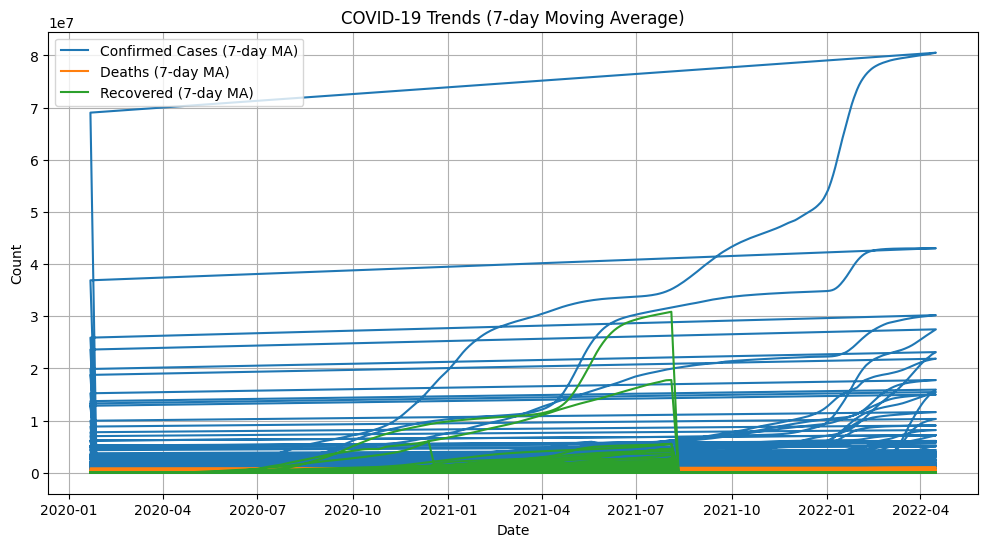

In [29]:
# Analyze growth rate using moving averages (example)
# Example:
df['Confirmed_MA'] = df['Confirmed'].rolling(window=7).mean()
df['Deaths_MA'] = df['Deaths'].rolling(window=7).mean()
df['Recovered_MA'] = df['Recovered'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Confirmed_MA'], label='Confirmed Cases (7-day MA)')
plt.plot(df['Date'], df['Deaths_MA'], label='Deaths (7-day MA)')
plt.plot(df['Date'], df['Recovered_MA'], label='Recovered (7-day MA)')
plt.title('COVID-19 Trends (7-day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

## **7. What is the correlation between confirmed cases, deaths, and recoveries globally?**

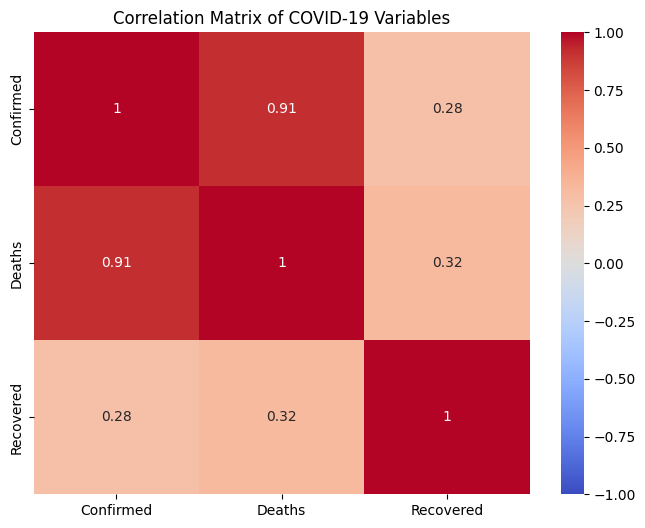

In [27]:
# Calculate correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

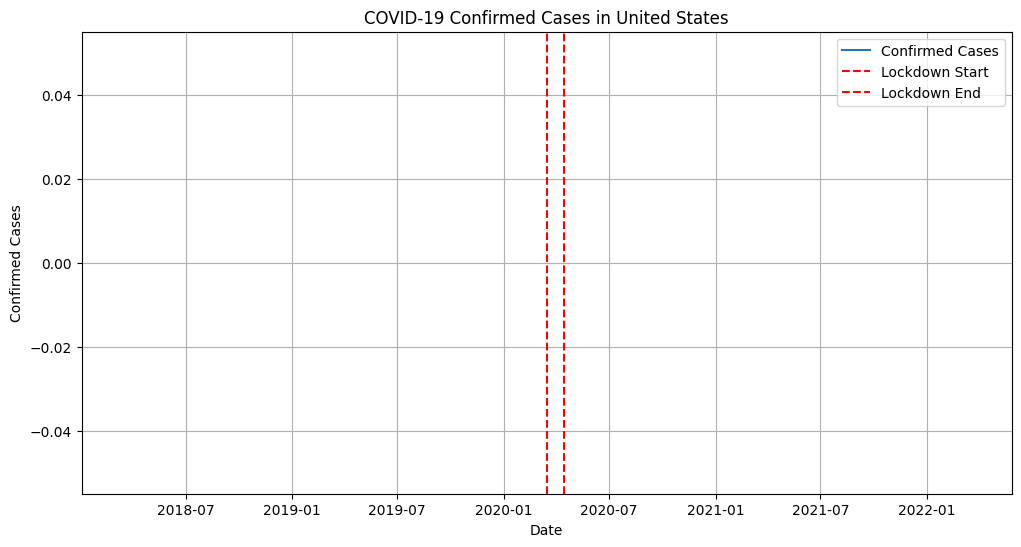

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

country = 'United States'
df_country = df[df['Country'] == country]

# Example: Plotting confirmed cases over time with lockdown periods highlighted
plt.figure(figsize=(12, 6))
plt.plot(df_country['Date'], df_country['Confirmed'], label='Confirmed Cases')
plt.title(f'COVID-19 Confirmed Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()

# Example: Adding markers or annotations for lockdown periods
lockdown_dates = pd.to_datetime(['2020-03-15', '2020-04-15'])  # Example lockdown dates
lockdown_labels = ['Lockdown Start', 'Lockdown End']  # Example labels
for date, label in zip(lockdown_dates, lockdown_labels):
    plt.axvline(date, color='red', linestyle='--', label=label)
plt.grid(True)
plt.legend()
plt.show()

## **9. How does the number of tests conducted relate to the number of confirmed cases in various countries?** (No DATA For tests)

In [32]:
# Assuming 'df' has columns 'Country', 'Date', 'Confirmed', 'Tests' (number of tests conducted)

# Example: Calculate daily tests per confirmed case ratio
df['Tests_per_Case'] = df['Tests']/df['Confirmed']

# Example: Visualize relationship using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Tests'], df['Confirmed'], alpha=0.5)
plt.title('Relationship Between Tests Conducted and Confirmed Cases')
plt.xlabel('Tests Conducted')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()

KeyError: 'Tests'

## **10. What is the distribution of confirmed cases, deaths, and recoveries by continent?** (No DATA for Continents)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load augmented dataset with continents
df = pd.read_csv('covid19_with_continents.csv')

# Aggregate data by continent
df_continent = df.groupby('Continent').sum()[['Confirmed', 'Deaths', 'Recovered']].reset_index()

# Plotting distribution using stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_continent['Continent'], df_continent['Confirmed'], label='Confirmed', alpha=0.8)
plt.bar(df_continent['Continent'], df_continent['Deaths'], label='Deaths', alpha=0.8)
plt.bar(df_continent['Continent'], df_continent['Recovered'], label='Recovered', alpha=0.8)
plt.title('Distribution of COVID-19 Metrics by Continent')
plt.xlabel('Continent')
plt.ylabel('Counts')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'covid19_with_continents.csv'